Prática a respeito do algoritmo KNN - k-Nearest Neighbors.

A base de dados utilizado é CreditCard, que classifica a probabilidade ou não de fraudes em cartão de crédito.

# Pre processamento dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,...,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,...,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,...,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,...,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,...,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,...,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
df.loc[pd.isnull(df['V15'])]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Alternativa: excluir a linha, pois pode provocar convergência mesmo tratando os valores

In [8]:
df = df.dropna(subset=["Class"]) # exclui a linha onde 'class' é nulo

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Visualizar dados

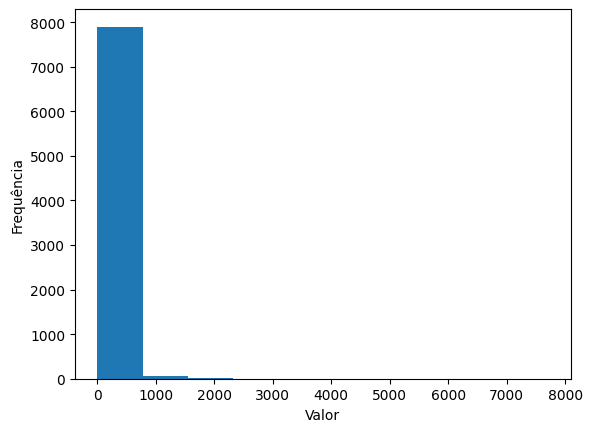

In [10]:
plt.hist(df['Amount']);
plt.xlabel("Valor")
plt.ylabel("Frequência");

## Divisão previsores e classe

In [11]:
X_credit = df.iloc[:, 0:29].values

In [12]:
X_credit

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -1.89114844e-01,  1.33558377e-01, -2.10530535e-02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.25894532e-01, -8.98309914e-03,  1.47241692e-02],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -1.39096572e-01, -5.53527940e-02, -5.97518406e-02],
       ...,
       [ 1.09810000e+04,  1.19042824e+00, -1.22329144e-01, ...,
         1.00448326e+00, -1.00188315e-01, -4.77439733e-03],
       [ 1.09810000e+04, -7.25174766e-01,  2.98202350e-01, ...,
        -5.10600992e-01, -3.11419393e-02,  2.55638666e-02],
       [ 1.09810000e+04,  1.22615304e+00, -1.29645121e-01, ...,
         1.03778638e+00, -1.00081361e-01, -9.86920840e-03]])

In [13]:
type(X_credit)

numpy.ndarray

In [14]:
y_credit = df.iloc[:, 30].values

In [15]:
y_credit

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
type(y_credit)

numpy.ndarray

## Divisão treino e teste

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

# KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((5979, 29), (5979,))

In [21]:
X_credit_teste.shape, y_credit_teste.shape

((1993, 29), (1993,))

In [22]:
# numero de vizinhos, metrica de distancia, tipo de distancia (euclidiana)
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
# treina
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [23]:
previsoes = knn_credit.predict(X_credit_teste)
previsoes

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
y_credit_teste

array([0., 0., 0., ..., 0., 0., 0.])

In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

0.9959859508278976

0.9959859508278976

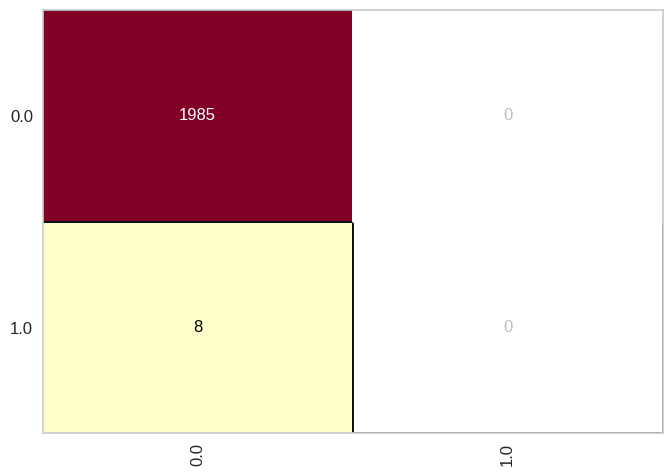

In [26]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [28]:
print(classification_report(y_credit_teste, previsoes));

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1985
         1.0       0.00      0.00      0.00         8

    accuracy                           1.00      1993
   macro avg       0.50      0.50      0.50      1993
weighted avg       0.99      1.00      0.99      1993



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Tentando com mais vizinhos

In [29]:
# numero de vizinhos, metrica de distancia, tipo de distancia (euclidiana)
knn_credit = KNeighborsClassifier(n_neighbors=5000, metric='minkowski', p = 2)
# treina
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier(n_neighbors=5000)

In [30]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

0.9959859508278976

0.9959859508278976

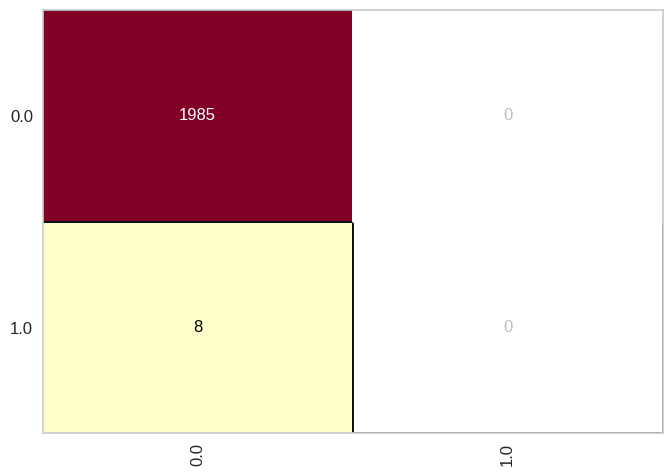

In [31]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [32]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1985
         1.0       0.00      0.00      0.00         8

    accuracy                           1.00      1993
   macro avg       0.50      0.50      0.50      1993
weighted avg       0.99      1.00      0.99      1993



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
